# Codeanywhere TensorFlow Template

Welcome to the TensorFlow MNIST Digit Classification template! This interactive notebook will guide you through creating an image classification project using the classic MNIST dataset of handwritten digits.

In this notebook, you'll learn how to:

* **Load the Dataset:** Import the MNIST dataset and prepare it for our model.
* **Build a Neural Network:** Create an effective network to recognize handwritten digits.
* **Train Your Model:** Teach your network to identify different digits with a training loop.
* **Test It Out:** Evaluate your model's performance on new images.

Let's dive in and become an AI engineer!

## Importing Required Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2025-02-25 10:48:17.378521: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-25 10:48:17.379949: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-25 10:48:17.385244: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-25 10:48:17.407730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740480497.437723    2334 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740480497.44

## Loading the MNIST Dataset

We'll use the MNIST dataset, which contains 70,000 grayscale images of handwritten digits (0-9), split into 60,000 training images and 10,000 testing images.

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

print(f"Training samples: {x_train.shape[0]}")
print(f"Test samples: {x_test.shape[0]}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training samples: 60000
Test samples: 10000


## Visualizing the Data

Let's take a look at some sample images from our dataset.

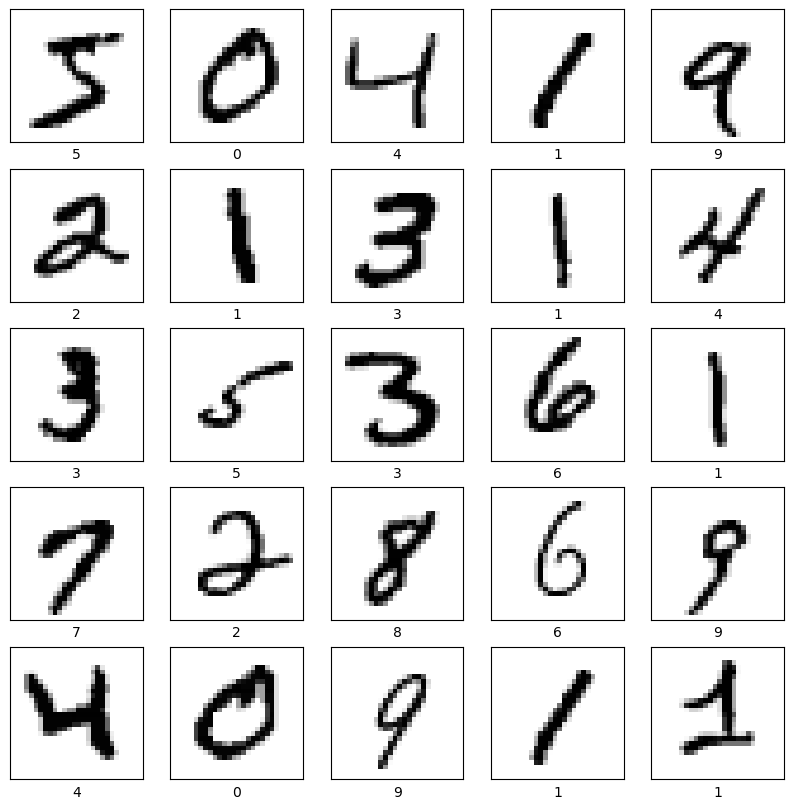

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

## Building the Neural Network

Now, let's create our neural network model using Keras, which is part of TensorFlow.

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-02-25 10:48:37.139690: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

Let's train our model on the MNIST dataset.

In [5]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8722 - loss: 0.4363 - val_accuracy: 0.9678 - val_loss: 0.1164
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9676 - loss: 0.1076 - val_accuracy: 0.9735 - val_loss: 0.0921
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9800 - loss: 0.0678 - val_accuracy: 0.9747 - val_loss: 0.0951
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9830 - loss: 0.0538 - val_accuracy: 0.9772 - val_loss: 0.0895
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9877 - loss: 0.0391 - val_accuracy: 0.9775 - val_loss: 0.0793
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9909 - loss: 0.0297 - val_accuracy: 0.9773 - val_loss: 0.0915
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9906 - loss: 0.0272 - val_accuracy: 0.9758 - val_loss: 0.1044
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9924 - loss: 0.0221 - 

## Evaluating the Model

Now that our model is trained, let's evaluate its performance on the test set.

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

313/313 - 0s - 1ms/step - accuracy: 0.9771 - loss: 0.0951

Test accuracy: 0.98


## Making Predictions

Let's use our trained model to make predictions on some test images.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


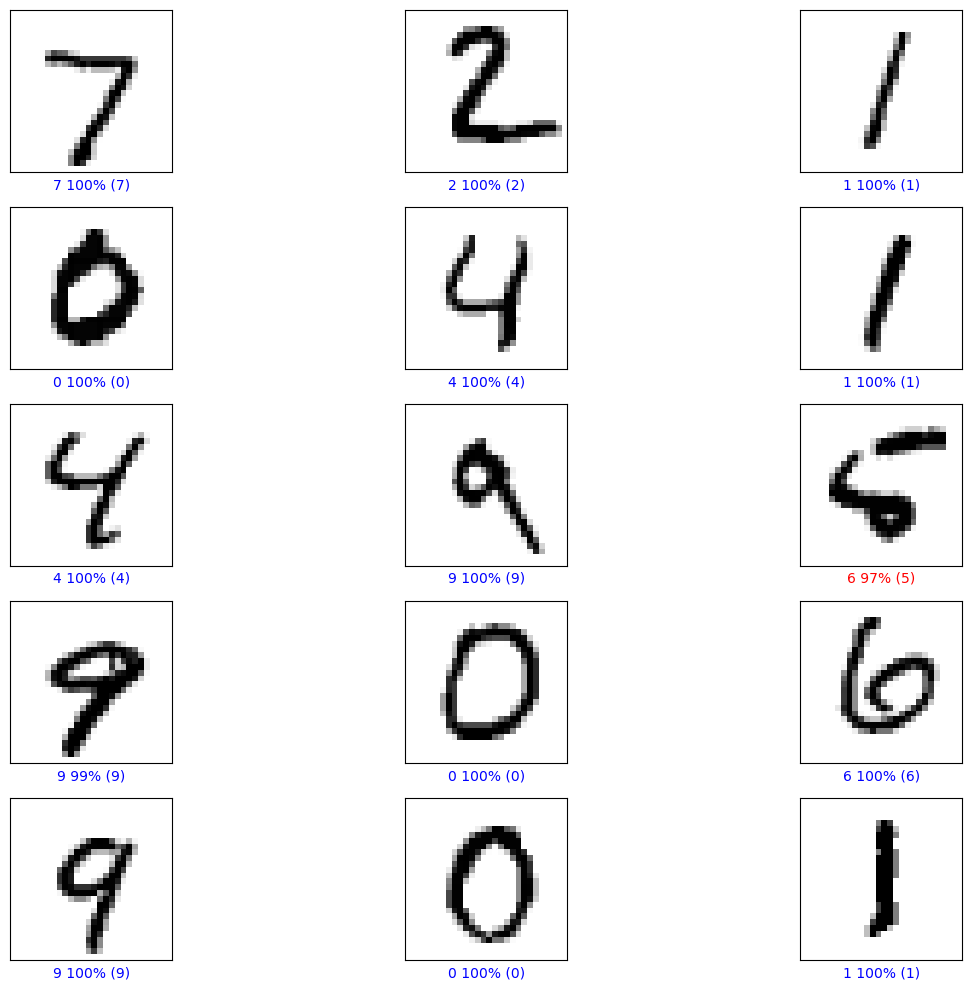

In [7]:
predictions = model.predict(x_test)

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()

## Saving the Model

Let's save our trained model so we can use it later without retraining.

In [9]:
model.save('mnist_model.keras')
print("Saved model to mnist_model.keras")

Saved model to mnist_model.keras


## Conclusion

Congratulations! You've successfully built, trained, and evaluated a neural network for handwritten digit recognition using TensorFlow and the MNIST dataset. This project demonstrates the basics of image classification and provides a foundation for more complex computer vision tasks.

To learn more, check out the [TensorFlow documentation](https://www.tensorflow.org/tutorials) for additional tutorials and resources.